![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

# #02 | Why gender was the most important factor to survive the Titanic

![](src/tree.jpg)

Learn how to develop a Decision Tree Classifier in Python to understand why gender was the most important factor to survive the Titanic accident.

## Introduction to Supervised Classification Models

Machine Learning is a field that focuses on [**getting a mathematical equation**](https://twitter.com/sotastica/status/1449735653328031745) to make predictions about the future. Although not all Machine Learning models work the same way.

Which types of Machine Learning models can we distinguish so far?

- **Classifiers** to predict **Categorical Variables**
- **Regressors** to predict **Numerical Variables**

The previous chapter covered the explanation of a Regressor model: the Linear Regression.

This chapter covers the explanation of a Classification model: the Decision Tree.

Why do they belong to Machine Learning?

- The Machine wants to get the best numbers of a mathematical equation such that **the difference between reality and predictions is minimum**:

    - **Classifier** evaluates the model based on **prediction success rate**
        $$
        y \stackrel{?}{=} \hat y
        $$
    - **Regressor** evaluates the model based on the **distance between real data and predictions** (residuals) 
        $$
        y - \hat y
        $$

There are many Machine Learning Models of each type.

You don't need to know the process behind each model because they all work the same way (see article). In the end, you will choose the one makes better predictions.

This tutorial will show you how to develop a Decision Tree to calculate the probability of a person to survive the Titanic and the different evaluation metrics we can calculate on Classification Models.

**Table of Important Content**

1. 🛀 [How to preprocess/clean the data to fit a Machine Learning model?](#Data-Preprocessing)
    - Dummy Variables
    - Missing Data
2. 🤩 [How to **visualize** a Decision Tree model in Python step by step?](#Model-Visualization)
3. 🤔 [How to **interpret** the nodes and leafs values of a Decision Tree plot?](#Model-Interpretation)
4. ⚠️ How to **evaluate** Classification models?
    - [Accuracy](#Model's-Score)
    - [Confussion Matrix](#The-Confusion-Matrix-to-compute-Other-Classification-Metrics)
        - Sensitivity
        - Specificity
        - ROC Curve
5. 🏁 [How to compare Classification models to choose the best one?](#Which-One-Is-the-Best-Model?-Why?)

## [ ] Load the Data

- This dataset represents **people** (rows) aboard the Titanic
- And their **sociological characteristics** (columns)

In [1]:
import seaborn as sns #!
import pandas as pd

df_titanic = sns.load_dataset(name='titanic')[['survived', 'sex', 'age', 'embarked', 'class']]
df_titanic

,survived,sex,age,embarked,class
0,0,male,22.0,S,Third
1,1,female,38.0,C,First
...,...,...,...,...,...
889,1,male,26.0,C,First
890,0,male,32.0,Q,Third


## How do we compute a Decision Tree Model in Python?

### Import the Class

In [2]:
from sklearn.tree import DecisionTreeClassifier

### Instantiante the Class

In [3]:
model_dt = DecisionTreeClassifier(max_depth=2)

### Access the Function

In [4]:
model_dt.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate the Variables

In [8]:
target = df_titanic.survived

In [9]:
features = df_titanic.drop(columns='survived')

### Fit the Model

In [10]:
model_dt.fit(X=features, y=target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

## [ ] Data Preprocessing

### Dummy Variables

In [11]:
df_titanic

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1
1,1,38.0,0,0,0,0,0
...,...,...,...,...,...,...,...
889,1,26.0,1,0,0,0,0
890,0,32.0,1,1,0,0,1


In [12]:
df_titanic = pd.get_dummies(data=df_titanic, drop_first=True)

In [13]:
target = df_titanic.survived

In [14]:
features = df_titanic.drop(columns='survived')

**Fit the Model Again**

In [15]:
model_dt.fit(X=features, y=target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Missing Data

In [16]:
df_titanic.isna().sum()

survived          0
age             177
sex_male          0
embarked_Q        0
embarked_S        0
class_Second      0
class_Third       0
dtype: int64

In [17]:
df_titanic.isna().sum(axis=1)>=1

0      False
1      False
       ...  
889    False
890    False
Length: 891, dtype: bool

In [18]:
mask = df_titanic.isna().sum(axis=1)>=1

In [19]:
df_titanic[mask]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
5,0,NaN,1,1,0,0,1
17,1,NaN,1,0,1,1,0
...,...,...,...,...,...,...,...
878,0,NaN,1,0,1,0,1
888,0,NaN,0,0,1,0,1


In [20]:
df_titanic = df_titanic.dropna().reset_index(drop=True)

In [21]:
target = df_titanic.survived

In [22]:
features = df_titanic.drop(columns='survived')

**Fit the Model Again**

In [23]:
model_dt.fit(X=features, y=target)

DecisionTreeClassifier(max_depth=2)

### [ ] Predictions

#### Calculate Predictions

In [24]:
y_pred = model_dt.predict_proba(X=features)[:,1]

#### Add a New Column with the Predictions

In [25]:
df_pred = df_titanic[['survived']].copy()

In [26]:
df_pred['pred_proba_dt'] = y_pred

In [27]:
df_pred.head(10)

,survived,pred_proba_dt
0,0,0.179487
1,1,0.943396
2,1,0.460784
3,1,0.943396
4,0,0.179487
5,0,0.179487
6,0,0.666667
7,1,0.460784
8,1,0.943396
9,1,0.460784


In [28]:
df_pred.pred_proba_dt > 0.5

0      False
1       True
       ...  
712    False
713    False
Name: pred_proba_dt, Length: 714, dtype: bool

In [29]:
import numpy as np

In [30]:
df_pred['pred_dt'] = np.where(df_pred.pred_proba_dt > 0.5, 1, 0)

In [31]:
df_pred.head(10)

,survived,pred_proba_dt,pred_dt
0,0,0.179487,0
1,1,0.943396,1
2,1,0.460784,0
3,1,0.943396,1
4,0,0.179487,0
5,0,0.179487,0
6,0,0.666667,1
7,1,0.460784,0
8,1,0.943396,1
9,1,0.460784,0


### [ ] Model Visualization

In [32]:
from sklearn.tree import plot_tree

In [33]:
features

,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,1,0,1
1,38.0,0,0,0,0,0
...,...,...,...,...,...,...
712,26.0,1,0,0,0,0
713,32.0,1,1,0,0,1


In [34]:
features.columns

Index(['age', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second',
       'class_Third'],
      dtype='object')

In [35]:
import matplotlib.pyplot as plt

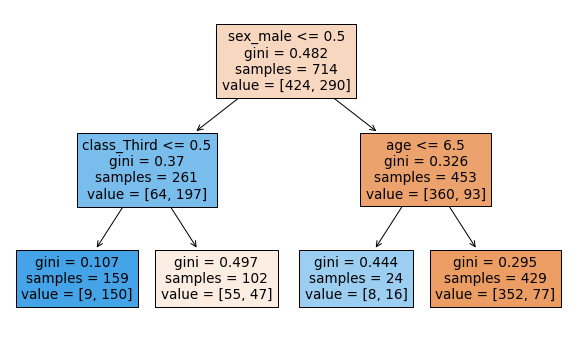

In [36]:
plt.figure(figsize=(10, 6))
plot_tree(decision_tree=model_dt, feature_names=features.columns, filled=True);

### Model Interpretation

In [37]:
df_titanic[:1]

,survived,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,22.0,1,0,1,0,1


In [38]:
features[:1]

,age,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,22.0,1,0,1,0,1


In [39]:
model_dt.predict_proba(features[:1])

array([[0.82051282, 0.17948718]])

In [40]:
77/429

0.1794871794871795

In [41]:
df_pred

,survived,pred_proba_dt,pred_dt
0,0,0.179487,0
1,1,0.943396,1
...,...,...,...
712,1,0.179487,0
713,0,0.179487,0


### [ ] How does the Decision Tree Algorithm computes the Mathematical Equation?

In [42]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/_L39rN6gz7Y" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### [ ] Model's Score

#### Calculate the Score

In [43]:
model_dt.score(X=features, y=target)

0.8025210084033614

#### The Score Step-by-step

In [44]:
df_pred

,survived,pred_proba_dt,pred_dt
0,0,0.179487,0
1,1,0.943396,1
...,...,...,...
712,1,0.179487,0
713,0,0.179487,0


In [45]:
df_pred.survived == df_pred.pred_dt

0       True
1       True
       ...  
712    False
713     True
Length: 714, dtype: bool

In [46]:
comp = df_pred.survived == df_pred.pred_dt

In [47]:
comp.sum()

573

In [48]:
comp.sum()/714

0.8025210084033614

In [49]:
df_pred[['survived','pred_dt']].value_counts()

survived  pred_dt
0         0          407
1         1          166
          0          124
0         1           17
dtype: int64

In [50]:
166/(166+124)

0.5724137931034483

### [ ] The Confusion Matrix to Compute Other Classification Metrics

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [52]:
cm = confusion_matrix(y_pred=df_pred.pred_dt, y_true=df_pred.survived)

In [53]:
CM = ConfusionMatrixDisplay(cm)

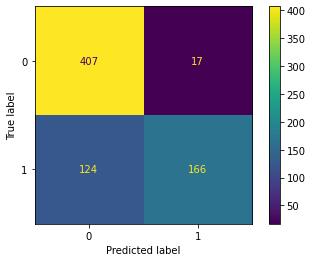

In [54]:
CM.plot()

#### Specificity (Recall=0)

In [55]:
407/(407+17)

0.9599056603773585

#### Sensitivity (Recall=1)

In [56]:
166/(166+124)

0.5724137931034483

#### Classification Report

In [57]:
from sklearn.metrics import classification_report

In [58]:
report = classification_report(y_pred=df_pred.pred_dt, y_true=df_pred.survived)

In [59]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       424
           1       0.91      0.57      0.70       290

    accuracy                           0.80       714
   macro avg       0.84      0.77      0.78       714
weighted avg       0.82      0.80      0.79       714



#### [ ] ROC Curve

In [60]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [61]:
from sklearn.metrics import RocCurveDisplay

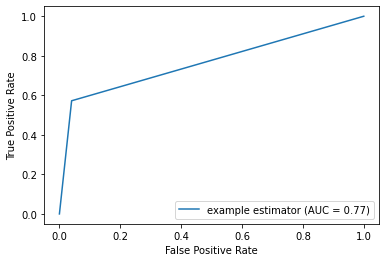

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
y = df_pred.survived
pred = df_pred.pred_dt
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

## [ ] Other Classification Models

### `RandomForestClassifier()` in Python

#### Fit the Model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model_rf = RandomForestClassifier()

In [69]:
model_rf.fit(X=features, y=target)

RandomForestClassifier()

#### Calculate Predictions

In [71]:
df_pred

,survived,pred_proba_dt,pred_dt
0,0,0.179487,0
1,1,0.943396,1
...,...,...,...
712,1,0.179487,0
713,0,0.179487,0


In [72]:
df_pred['pred_rf'] = model_rf.predict(X=features)

In [73]:
df_pred

,survived,pred_proba_dt,pred_dt,pred_rf
0,0,0.179487,0,0
1,1,0.943396,1,1
...,...,...,...,...
712,1,0.179487,0,1
713,0,0.179487,0,0


#### Model's Score

In [74]:
model_rf.score(X=features,y=target)

0.9117647058823529

In [75]:
model_dt.score(X=features,y=target)

0.8025210084033614

### `SVC()` in Python

#### Fit the Model

In [76]:
from sklearn.svm import SVC

In [77]:
model_sv = SVC()

In [78]:
model_sv.fit(X=features, y=target)

SVC()

#### Calculate Predictions

In [80]:
df_pred

,survived,pred_proba_dt,pred_dt,pred_rf
0,0,0.179487,0,0
1,1,0.943396,1,1
...,...,...,...,...
712,1,0.179487,0,1
713,0,0.179487,0,0


In [81]:
df_pred['pred_sv'] = model_sv.predict(X=features)

In [82]:
df_pred

,survived,pred_proba_dt,pred_dt,pred_rf,pred_sv
0,0,0.179487,0,0,0
1,1,0.943396,1,1,0
...,...,...,...,...,...
712,1,0.179487,0,1,0
713,0,0.179487,0,0,0


#### Model's Score

In [83]:
model_sv.score(X=features, y=target)

0.6190476190476191

In [84]:
model_dt.score(X=features, y=target)

0.8025210084033614

In [85]:
model_rf.score(X=features, y=target)

0.9117647058823529

## Which One Is the Best Model? Why?

In [83]:
model_sv.score(X=features, y=target)

0.6190476190476191

In [84]:
model_dt.score(X=features, y=target)

0.8025210084033614

In [85]:
model_rf.score(X=features, y=target)

0.9117647058823529

In [86]:
df_pred

,survived,pred_proba_dt,pred_dt,pred_rf,pred_sv
0,0,0.179487,0,0,0
1,1,0.943396,1,1,0
...,...,...,...,...,...
712,1,0.179487,0,1,0
713,0,0.179487,0,0,0


<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.